# Анализ жертв в войне в Афганистане

Ссылка на курс "Геопространственный анализ данных":\
https://darribas.org/gds_course/content/home.html

Ссылка на книгу "Геопространственный анализ данных":\
https://geographicdata.science/book/intro.html

Часть B\
https://darribas.org/gds_course/content/bB/diy_B.html

**Задачи проекта**

Необходимо ответить на следующие вопросы:
1.   Какое минимальное количество жертв среди гражданского населения было зарегестрировано и в каком месяце?
2.   Сколько потерь НАТО было зарегистрировано в августе 2008 года?
3.   В каком месяце зарегистрировано наибольшее количество жертв?
4.   Построить график распределения потерь во времени.

В качестве датасета будет использован набор данных о потерях в войне в Афганистане.\
Данные первоначально были опубликованы Wikileaks. Версия, которую будем использовать мы, была опубликована The Guardian.

https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1

Каждая запись/строка включает потери, зарегистрированные по месяцам, с разбивкой по Талибану, гражданскому населению, афганским силам и НАТО.

**Описание данных**

* Year — год;
* Month — месяц;
* Taliban — Талибан;
* Civilians —	гражданское население;
* Afghan forces — афганские силы;
* Nato (detailed in spreadsheet) — НАТО;
* Nato — official figures — НАТО (по официальным данные).

Охват данных агрегируются по пространственной (район) или временной единице (месяц), каждый подсчет разделен на несколько категорий.

## Этап 1. Загрузка данных и подготовка их к анализу

In [ ]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Загрузим файл по url
url = ("https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/export?format=csv&gid=1")
url

'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/export?format=csv&gid=1'

In [ ]:
# Прочитаем файл через url
db = pd.read_csv(url, skiprows=[0, -1], thousands=",")

In [ ]:
# Выведем пять рандомных строчек датасета 'db'
db.sample(n=5, random_state=None)

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
68,2009.0,September,614.0,197,133.0,54.0,70.0
51,2008.0,April,128.0,55,86.0,16.0,14.0
60,2009.0,January,185.0,31,34.0,19.0,25.0
29,2006.0,June,295.0,71,39.0,19.0,22.0
44,2007.0,September,917.0,64,144.0,20.0,24.0


In [ ]:
# Посмотрим на общую информацию датасета 'db'
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            72 non-null     float64
 1   Month                           73 non-null     object 
 2   Taliban                         72 non-null     float64
 3   Civilians                       73 non-null     int64  
 4   Afghan forces                   71 non-null     float64
 5   Nato (detailed in spreadsheet)  67 non-null     float64
 6   Nato - official figures         72 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 4.1+ KB


In [ ]:
# Посмотрим описательные статистики датасета, транспонируем их
db.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,72.0,2006.500000,1.719810,2004.0,2005.00,2006.5,2008.00,2009.0
Taliban,72.0,430.750000,1813.710645,5.0,51.00,162.0,325.25,15507.0
Civilians,73.0,110.246575,466.486357,2.0,26.00,49.0,76.00,4024.0
Afghan forces,71.0,107.605634,448.580411,2.0,23.50,50.0,74.00,3820.0
Nato (detailed in spreadsheet),67.0,34.238806,139.084680,1.0,4.50,14.0,24.00,1147.0
Nato - official figures,72.0,19.861111,17.678112,1.0,6.75,17.0,27.25,77.0


In [ ]:
# Определим размер датасета
db.shape

(73, 7)

**Выводы:**

*   Предварительно можно утверждать, что, данных достаточно для проверки гипотез.
*   Встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.
*   Год и месяц представлены в некорректном формате.

Чтобы двигаться дальше, нужно устранить проблемы в данных.



## Этап 2. Предобработка данных

Исправим стиль в заголовках столбцов, переведем дату в корректный формат, исключим пропуски. Затем проверим данные на дубликаты.

In [ ]:
# Чтобы в дальнейшем не скрывалась часть данных, настроим принудительное отображение столбцов
pd.set_option('display.max_columns', None)

In [ ]:
# Приведем названия столбцов к нижнему регистру
db.columns = map(str.lower, db.columns)

In [ ]:
# Уточним названия столбцов датасета 'db'
db.columns.to_list()

['year',
 'month',
 'taliban',
 'civilians',
 'afghan forces',
 'nato (detailed in spreadsheet)',
 'nato - official figures']

In [ ]:
# Переименуем некоторые столбцы
db = db.rename(columns={'nato (detailed in spreadsheet)':'nato', 'nato - official figures':'nato_official'})
# Уточним названия столбцов датасета 'db'
db.columns.to_list()

['year',
 'month',
 'taliban',
 'civilians',
 'afghan forces',
 'nato',
 'nato_official']

In [ ]:
# Cкорректируем названия столбцов (соединим слова нижней чертой) датасета 'db'
db.columns = [c.replace(' ', '_') for c in db.columns]
db.columns.to_list()

['year',
 'month',
 'taliban',
 'civilians',
 'afghan_forces',
 'nato',
 'nato_official']

In [ ]:
db['year'] = db['year'].astype('Int32')
# db['year'] = pd.DatetimeIndex(db['year']).year
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           72 non-null     Int32  
 1   month          73 non-null     object 
 2   taliban        72 non-null     float64
 3   civilians      73 non-null     int64  
 4   afghan_forces  71 non-null     float64
 5   nato           67 non-null     float64
 6   nato_official  72 non-null     float64
dtypes: Int32(1), float64(4), int64(1), object(1)
memory usage: 3.9+ KB


In [ ]:
# Выведем уникальные значения столбца 'year'
db['year'].unique()

<IntegerArray>
[2004, 2005, 2006, 2007, 2008, 2009, <NA>]
Length: 7, dtype: Int32

In [ ]:
# Выведем уникальные значения столбца 'month'
db['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December', '24498'],
      dtype=object)

In [ ]:
# Перезапишем столбец 'month', присвоив месяцам их порядковый номер с начала года
month_nums = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,\
              'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
db['month'] = db['month'].replace(month_nums)
db.sample(n=5)

,year,month,taliban,civilians,afghan_forces,nato,nato_official
32,2006,9,945.0,172,97.0,19.0,38.0
45,2007,10,462.0,46,75.0,11.0,15.0
3,2004,4,5.0,3,19.0,NaN,3.0
16,2005,5,113.0,49,25.0,4.0,4.0
46,2007,11,270.0,60,67.0,11.0,22.0


In [ ]:
# Посмотрим на наличие дубликатов датасета 'db'
db.duplicated().sum()

0

In [ ]:
# Проверим столбцы на наличие пропущенных значений
db.isnull().sum()

year             1
month            0
taliban          1
civilians        0
afghan_forces    2
nato             6
nato_official    1
dtype: int64

In [ ]:
# Скорректируем данные, удалив последнюю строку в таблице
db = db[:-1]
db.tail()

,year,month,taliban,civilians,afghan_forces,nato,nato_official
67,2009,8,445.0,206,190.0,64.0,77.0
68,2009,9,614.0,197,133.0,54.0,70.0
69,2009,10,462.0,107,86.0,76.0,74.0
70,2009,11,410.0,120,69.0,30.0,32.0
71,2009,12,287.0,87,65.0,33.0,35.0


In [ ]:
# Проверим столбцы на наличие пропущенных значений
db.isnull().sum()

year             0
month            0
taliban          1
civilians        0
afghan_forces    2
nato             6
nato_official    0
dtype: int64

In [ ]:
# db['taliban'] = db['taliban'].astype('Int64')
# db['afghan_forces'] = db['afghan_forces'].astype('Int64')
# db['nato'] = db['nato'].astype('Int64')
# db['nato_official'] = db['nato_official'].astype('Int64')

In [ ]:
# Выведем основную информацию о датафрейме
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           72 non-null     Int32  
 1   month          72 non-null     object 
 2   taliban        71 non-null     float64
 3   civilians      72 non-null     int64  
 4   afghan_forces  70 non-null     float64
 5   nato           66 non-null     float64
 6   nato_official  72 non-null     float64
dtypes: Int32(1), float64(4), int64(1), object(1)
memory usage: 3.9+ KB


**Вывод:**

В результате предобработки:
*   Скорректированы наименования столбцов — приведены в змеиный регистр;
*   Произведена замена типа данных в столбце с указанием года из формата 'float' в формат 'int';
*   Выявлено, что данные находятся в достаточно хорошем состоянии. Есть некоторое количество пропусков данных в столбцах 'taliban', 'afghan_forces' и 'nato'. Явные и неявные дубликаты в датасете не найдены.

## Этап 3. Ответы на вопросы ислледования

1.   Какое минимальное количество жертв среди гражданского населения было зарегестрировано и в каком месяце?
2.   Сколько потерь НАТО было зарегистрировано в августе 2008 года?
3.   В каком месяце зарегистрировано наибольшее количество жертв?
4.   Построить график распределения потерь во времени.

### 1. Какое минимальное количество жертв среди гражданского населения было зарегестрировано и в каком месяце?

In [ ]:
# Выведем пять рандомных строчек датасета 'db'
db.sample(n=3, random_state=None)

,year,month,taliban,civilians,afghan_forces,nato,nato_official
35,2006,12,216.0,51,36.0,3.0,4.0
65,2009,6,526.0,111,133.0,32.0,38.0
49,2008,2,139.0,120,35.0,7.0,7.0


In [ ]:
# Определим минимальное значение потерь среди гражданского населения 'civilians'
civilians_min = db['civilians'].min()
civilians_min

2

In [ ]:
# Определим месяц, в котором были зарегистрированы данные потери
month_min = db.loc[db['civilians'].min(), 'month']
month_min

3

**Ответ:** Минимальное количество жертв среди гражданского населения было в марте и составляет 2 человека.

### 2. Сколько потерь НАТО было зарегистрировано в августе 2008 года?

In [ ]:
# Определим, какое количество потерь НАТО было зарегистрировано в августе 2008 года
nato_casualties = db.query("(year == 2008) & (month == 8)")
nato_casualties = nato_casualties['nato_official']
nato_casualties

<ipython-input-27-a7dee9d3b863>:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  nato_casualties = db.query("(year == 2008) & (month == 8)")


55    46.0
Name: nato_official, dtype: float64

**Ответ:** В августе 2008 года в качестве потерь НАТО было зарегистрировано 46 человек.

### 3. В каком месяце зарегистрировано наибольшее количество жертв?

In [ ]:
# Уточним названия столбцов датасета 'db'
db.columns.to_list()

['year',
 'month',
 'taliban',
 'civilians',
 'afghan_forces',
 'nato',
 'nato_official']

In [ ]:
# Посчитаем общее количество зарегистрированных жертв по месяцам и запишем полученные данные в новый столбец 'total'
db['total'] = db[['taliban','civilians','afghan_forces','nato','nato_official']].sum(axis=1)
# Выведем максимальное общее количество зарегистрированных жертв, предварительно отсортировав полученные данные по столбцу 'total'
month_max = db.sort_values(by='total',  ascending=False).head(1)
# Выведем соответствующий год и месяц
month_max[['year', 'month']]

,year,month
32,2006,9


**Ответ:** Наибольшее количество жертв было зарегестрировано в сентябре 2006 года.

### 4. Построить график распределения потерь во времени



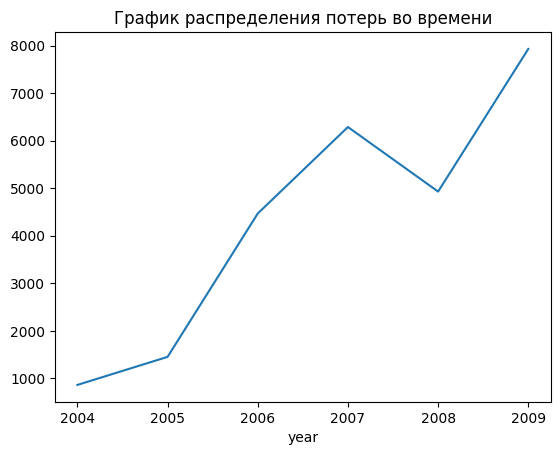

In [ ]:
# График распределения потерь во времени по годам
_ = db.groupby('year')['total'].sum().plot(title='График распределения потерь во времени')

In [ ]:
# Установим в качестве индексации столбец с датой 'year-month'
db['year_month'] = db['year'].astype('str') + ' ' + db['month'].astype('str')
db['year_month'] = pd.to_datetime(db['year_month'])
db = db.set_index('year_month')
db.head(3)

<ipython-input-31-93c966ae7424>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  db['year_month'] = pd.to_datetime(db['year_month'])


,year,month,taliban,civilians,afghan_forces,nato,nato_official,total
year_month,,,,,,,,
2004-01-01,2004,1,15.0,51,23.0,NaN,11.0,100.0
2004-02-01,2004,2,NaN,7,4.0,5.0,2.0,18.0
2004-03-01,2004,3,19.0,2,NaN,2.0,3.0,26.0


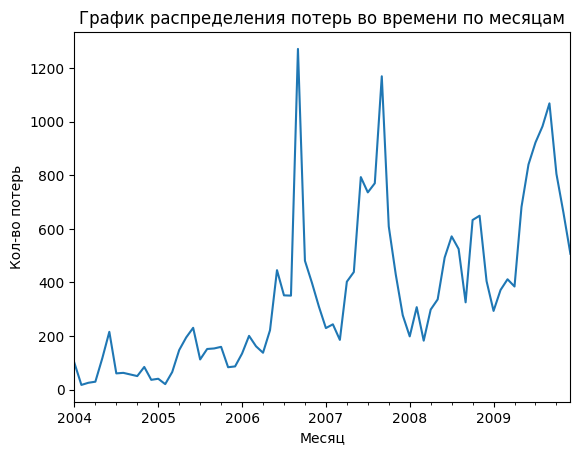

In [ ]:
# График распределения потерь во времени по месяцам
_ = db.sort_values(by=['year', 'month'], ascending=(True, True))['total'].plot()
plt.title('График распределения потерь во времени по месяцам')
plt.ylabel('Кол-во потерь')
plt.xlabel('Месяц')
plt.show()

## Этап 4. Результаты исследования

### Выводы

1.   Была проведена предобработка данных, в ходе которой:
  *   Скорректированы наименования столбцов — приведены в змеиный регистр;
  *   Произведена замена типа данных в столбце с указанием года из формата 'float' в формат 'int';
  *   Выявлено, что данные находятся в достаточно хорошем состоянии. Есть некоторое количество пропусков днных в столбцах 'taliban', 'afghan_forces' и 'nato'. Явные и неявные дубликаты в датасете не найдены;
2.   Было проведено исследование и получены ответы на поставленные вопросы:
  *   Минимальное количество жертв среди гражданского населения было в марте и составляет 2 человека;
  * В августе 2008 года в качестве потерь НАТО было зарегистрировано 46 человек;
  * Наибольшее количество жертв было зарегестрировано в сентябре 2006 года;
  * Были построены графики распределения потерь во времени по годам и месяцам.